In [222]:
import pandas as pd  
import numpy as np 
import os 
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [223]:
df = pd.read_csv('Holiday_Package.csv')

In [224]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [226]:
df.shape

(872, 7)

In [227]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [228]:
df.describe(include = 'all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [229]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [230]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




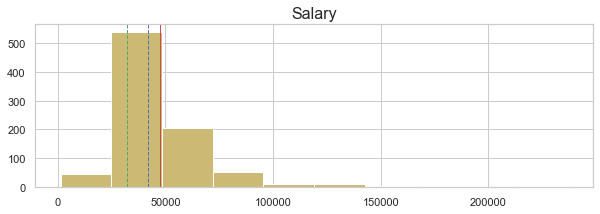

In [231]:
plt.figure(figsize=(10,3))
plt.title('Salary',fontsize=16)
plt.hist(df['Salary'], color='y') 
plt.axvline(df['Salary'].mean(), color='r', linewidth=1)
plt.axvline(df['Salary'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Salary'].mode()[0], color='g', linestyle='dashed', linewidth=1)

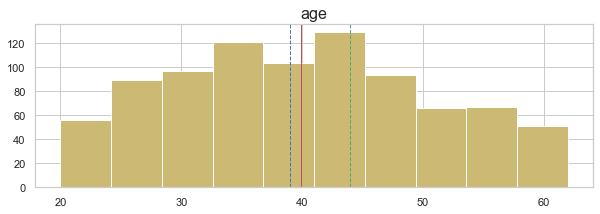

In [203]:
plt.figure(figsize=(10,3))
plt.title('age',fontsize=16)
plt.hist(df['age'], color='y') 
plt.axvline(df['age'].mean(), color='r', linewidth=1)
plt.axvline(df['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].mode()[0], color='g', linestyle='dashed', linewidth=1)

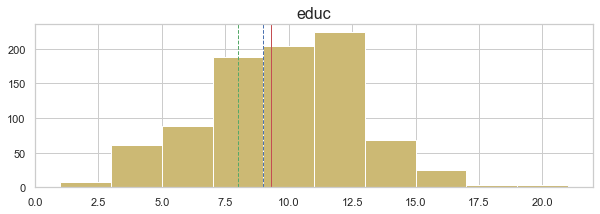

In [204]:
plt.figure(figsize=(10,3))
plt.title('educ',fontsize=16)
plt.hist(df['educ'], color='y') 
plt.axvline(df['educ'].mean(), color='r', linewidth=1)
plt.axvline(df['educ'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['educ'].mode()[0], color='g', linestyle='dashed', linewidth=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CB41B88>,
      dtype=object)

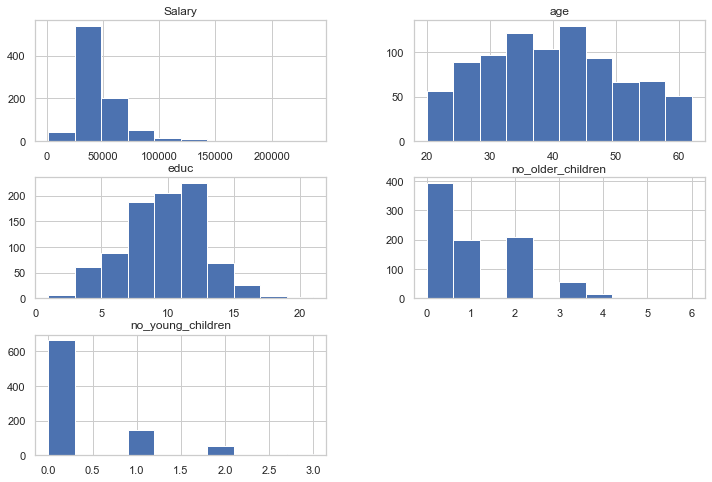

In [232]:
df.hist(figsize=(12,8))

In [233]:
df.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

Text(0.5, 1.0, 'variable-Holliday_Package')

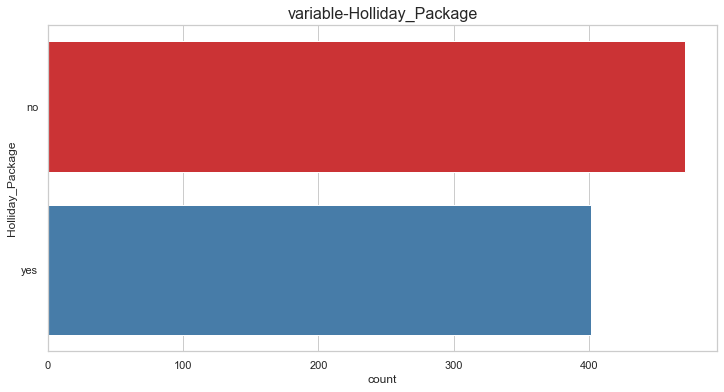

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.Holliday_Package),palette='Set1');
plt.title('variable-Holliday_Package',fontsize=16)

Text(0.5, 1.0, 'variable-foreign')

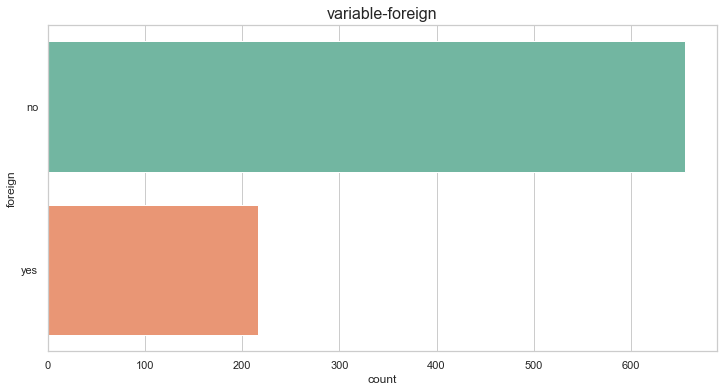

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.foreign),palette='Set2');
plt.title('variable-foreign',fontsize=16)

Text(0.5, 1.0, 'variable-no_young_children')

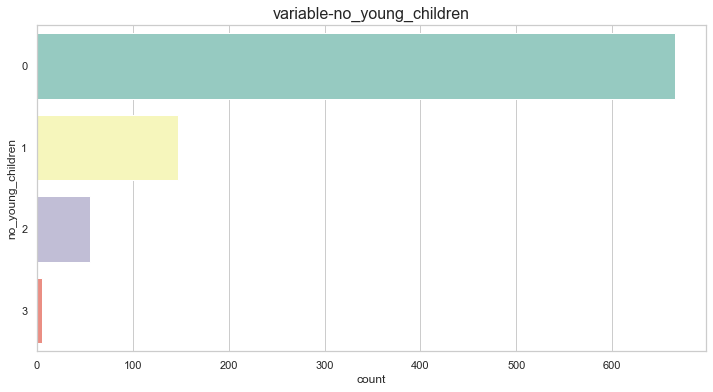

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.no_young_children),palette='Set3');
plt.title('variable-no_young_children',fontsize=16)

Text(0.5, 1.0, 'variable-no_older_children')

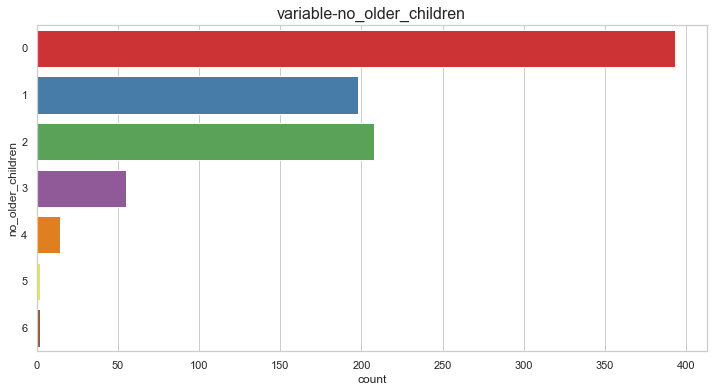

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.no_older_children),palette='Set1');
plt.title('variable-no_older_children',fontsize=16)

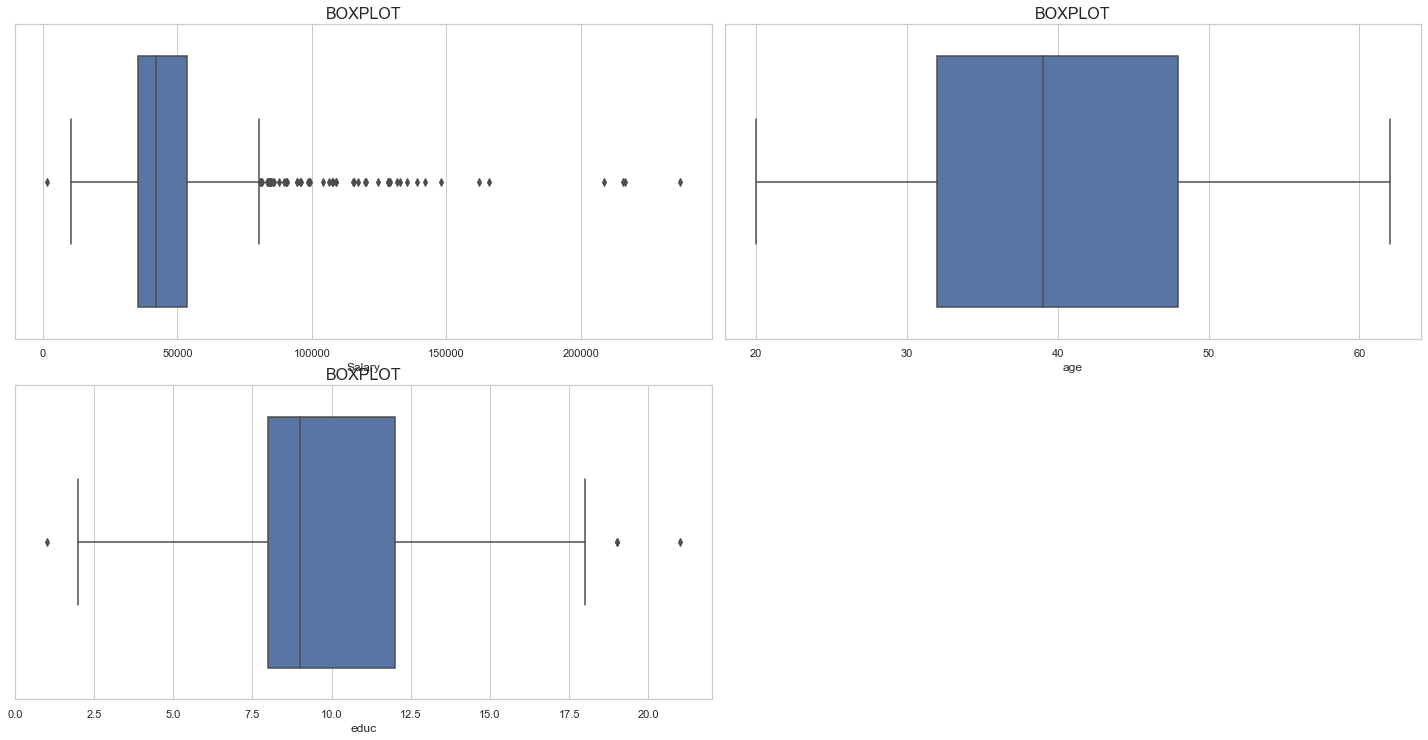

In [30]:
data_plot=df[['Salary','age','educ']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('BOXPLOT',fontsize=16)

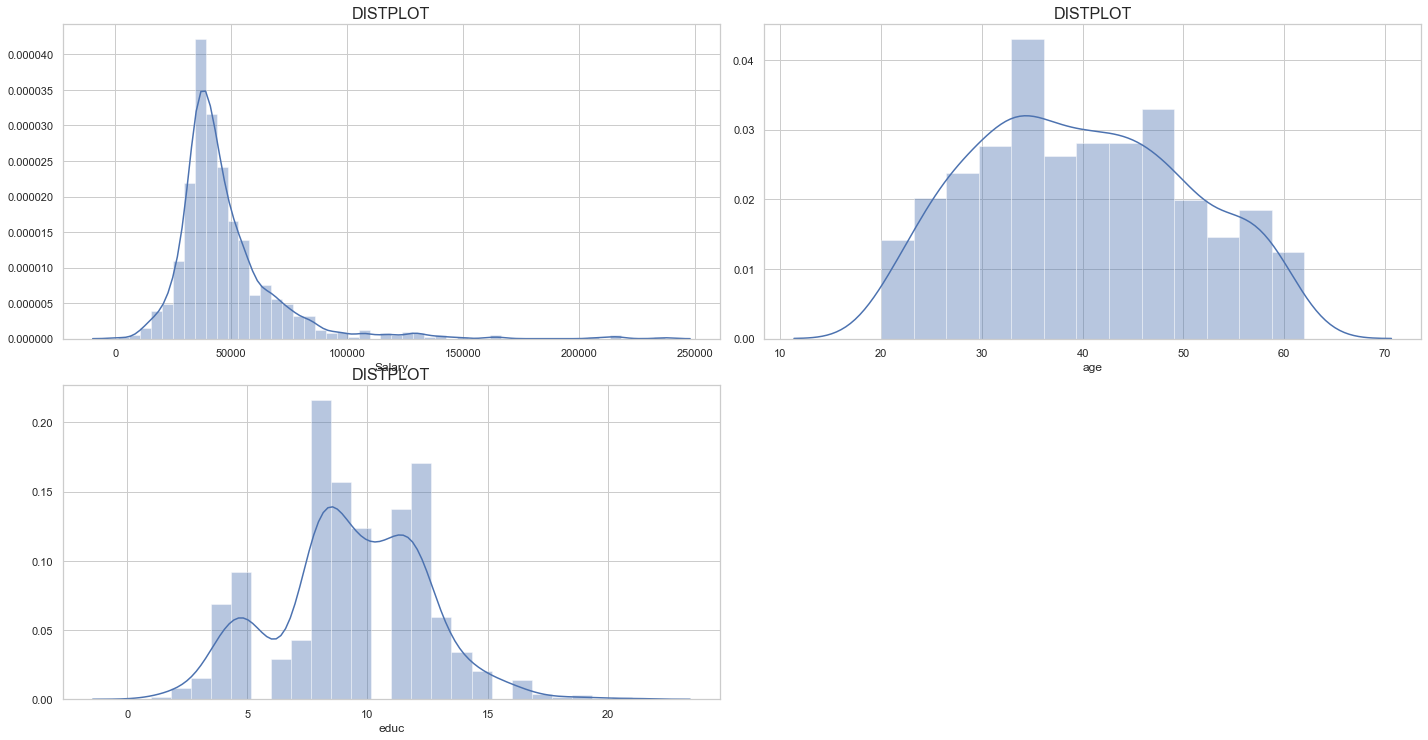

In [25]:
data_plot=df[['Salary','age','educ']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('DISTPLOT',fontsize=16)

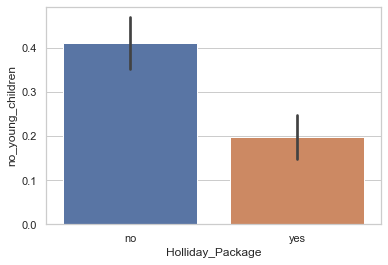

In [34]:
sns.barplot(x="Holliday_Package", y="no_young_children", data=df)

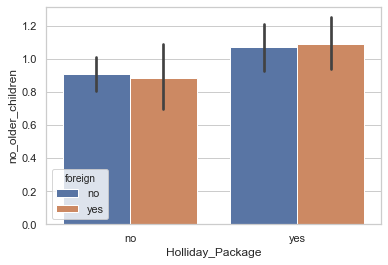

In [36]:
sns.barplot(x="Holliday_Package", y="no_older_children",hue = 'foreign', data=df)

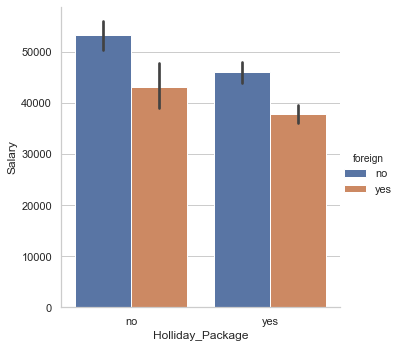

In [43]:
sns.catplot(x="Holliday_Package", y="Salary", hue="foreign", kind="bar", data=df)

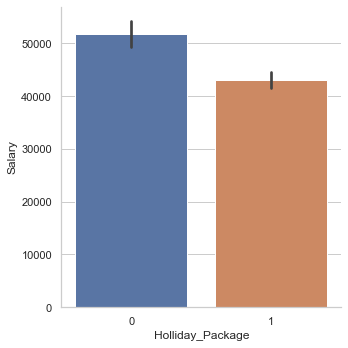

In [205]:
sns.catplot(x="Holliday_Package", y="Salary", kind="bar", data=df)

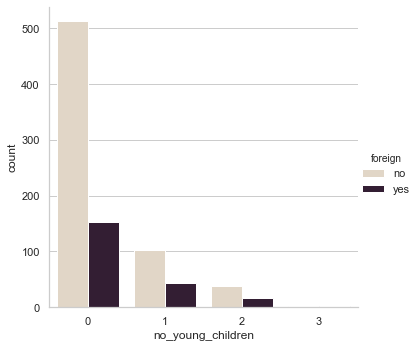

In [42]:
sns.catplot(x="no_young_children", kind="count", palette="ch:.25", hue = 'foreign', data=df)

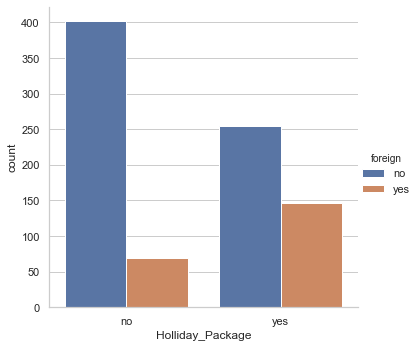

In [44]:
sns.catplot(x="Holliday_Package", kind="count", hue = 'foreign', data=df)

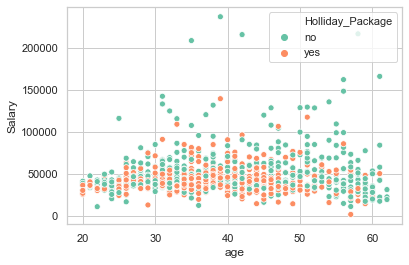

<Figure size 5760x1440 with 0 Axes>

In [46]:
sns.scatterplot(df['age'], df['Salary'], hue=df['Holliday_Package'],palette='Set2') 
fig=plt.figure(figsize=(80,20))

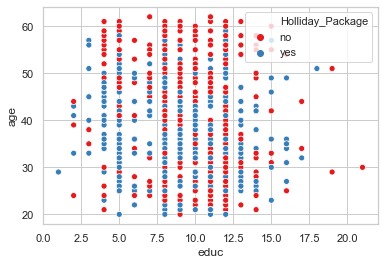

<Figure size 5760x1440 with 0 Axes>

In [49]:
sns.scatterplot(df['educ'], df['age'], hue=df['Holliday_Package'],palette='Set1') 
fig=plt.figure(figsize=(80,20))

In [234]:
df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


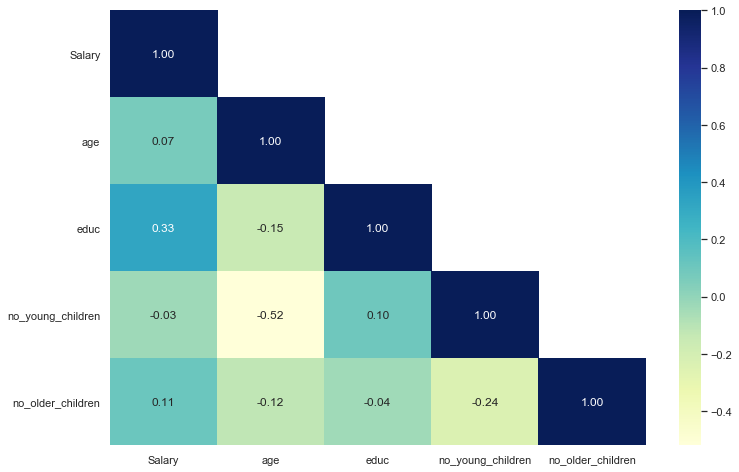

In [235]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:13].corr(),annot=True,fmt='.2f',cmap='YlGnBu',mask=np.triu(df.iloc[:,0:13].corr(),+1))
plt.show()

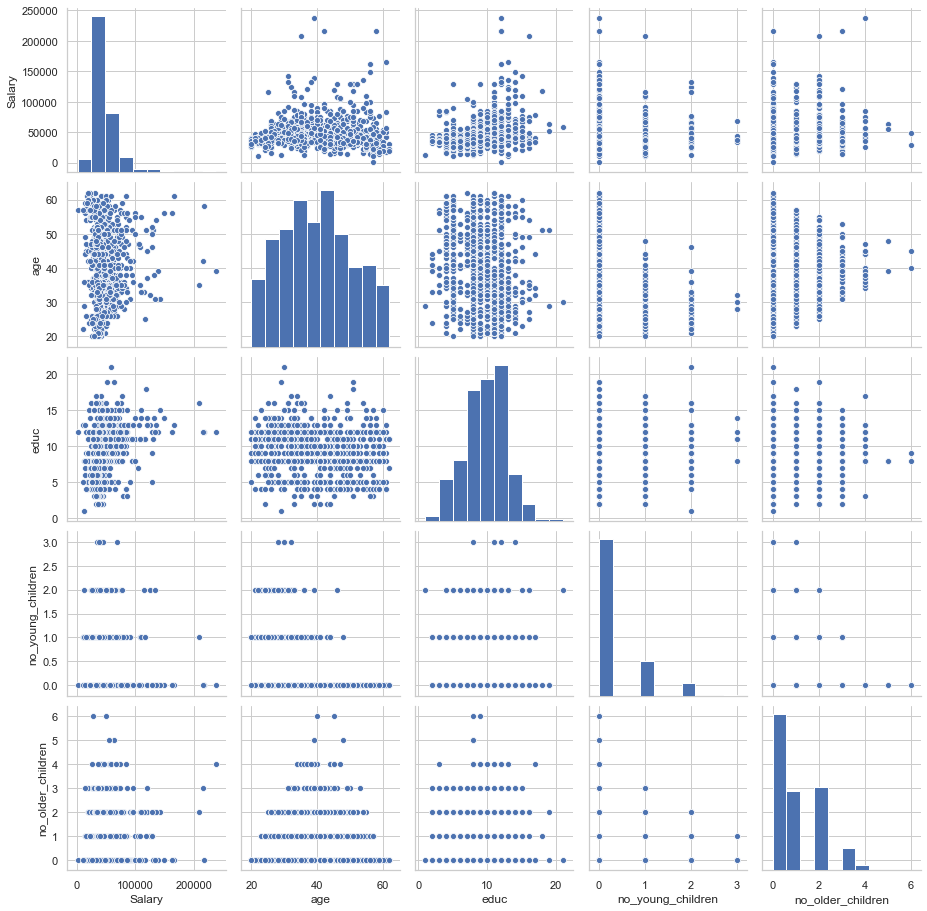

In [236]:
sns.pairplot(df)

In [237]:
data_df = df.drop('Holliday_Package',axis=1)

In [238]:
data_df

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,no
1,37207,45,8,0,1,no
2,58022,46,9,0,0,no
3,66503,31,11,2,0,no
4,66734,44,12,0,2,no
...,...,...,...,...,...,...
867,40030,24,4,2,1,yes
868,32137,48,8,0,0,yes
869,25178,24,6,2,0,yes
870,55958,41,10,0,1,yes


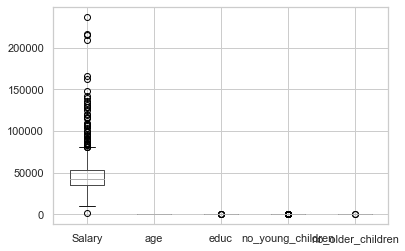

In [239]:
data_df.boxplot()

In [240]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range 

In [241]:
lApps,uApps=remove_outlier(data_df['Salary'])
data_df['Salary']=np.where(data_df['Salary']>uApps,uApps,data_df['Salary'])
data_df['Salary']=np.where(data_df['Salary']<lApps,lApps,data_df['Salary'])

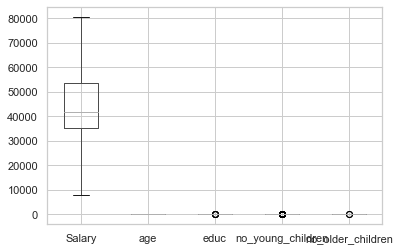

In [242]:
data_df.boxplot()

In [243]:
data_df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000


In [244]:
data_df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,45608.336869,39.955275,9.307339,0.311927,0.982798
std,15699.745151,10.551675,3.036259,0.612870,1.086786
min,8105.750000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,80687.750000,62.000000,21.000000,3.000000,6.000000


In [245]:
data_df.select_dtypes(include='object').head()

,foreign
0,no
1,no
2,no
3,no
4,no


In [246]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object':
        data_df[feature] = pd.Categorical(data_df[feature]).codes

In [247]:
data_df

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0
...,...,...,...,...,...,...
867,40030.0,24,4,2,1,1
868,32137.0,48,8,0,0,1
869,25178.0,24,6,2,0,1
870,55958.0,41,10,0,1,1


In [248]:
data_df.dtypes

Salary               float64
age                    int64
educ                   int64
no_young_children      int64
no_older_children      int64
foreign                 int8
dtype: object

In [249]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [250]:
df.dtypes

Holliday_Package      int8
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign               int8
dtype: object

In [251]:
df.head(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [252]:
X = data_df
y = df['Holliday_Package']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [254]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.5min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [255]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [256]:
model.score(X_train, y_train)

0.6672131147540984

In [257]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.733


Text(0.5, 1.0, 'Train Data')

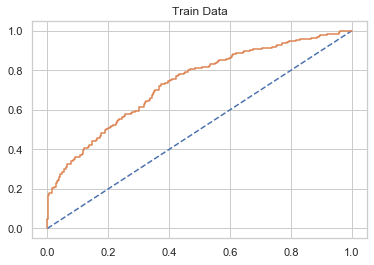

In [258]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title('Train Data')

In [284]:
model.score(X_test, y_test)

0.648854961832061

AUC: 0.715


Text(0.5, 1.0, 'Test Data')

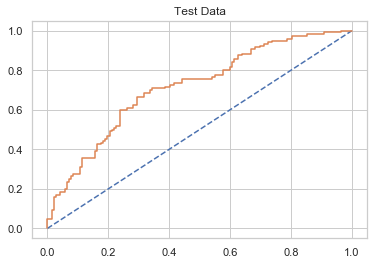

In [285]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title('Test Data')

In [261]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

Text(0.5, 1.0, 'Train Data Log Reg')

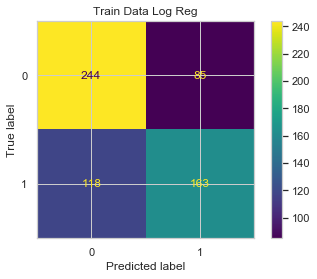

In [262]:
plot_confusion_matrix(model,X_train,y_train);
plt.title('Train Data Log Reg')

In [263]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [264]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

Text(0.5, 1.0, 'Test Data Log Reg')

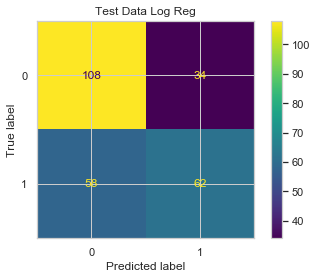

In [265]:
plot_confusion_matrix(model,X_test,y_test);
plt.title('Test Data Log Reg')

In [266]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [267]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [286]:
X1 = data_df
Y = df['Holliday_Package']

In [287]:
X_train1,X_test1,Y_train1,Y_test1 = model_selection.train_test_split(X1,Y,test_size=0.30,random_state=1,stratify = Y)

In [288]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train1,Y_train1)

In [289]:
pred_class_train = model1.predict(X_train1)
pred_class_test = model1.predict(X_test1)

Text(0.5, 1.0, 'Train Data LDA')

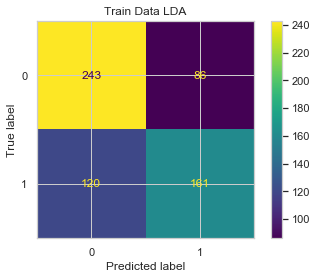

In [290]:
plot_confusion_matrix(model1,X_train1,Y_train1);
plt.title('Train Data LDA')

Text(0.5, 1.0, 'Test Data LDA')

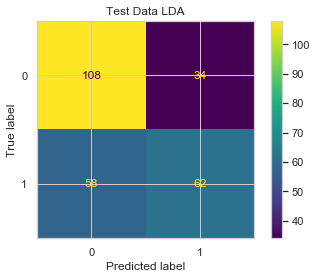

In [291]:
plot_confusion_matrix(model1,X_test1,Y_test1);
plt.title('Test Data LDA')

In [292]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train1,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test1,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



In [293]:
pred_prob_train = model1.predict_proba(X_train1)
pred_prob_test = model1.predict_proba(X_test1)

AUC for the Training Data: 0.731


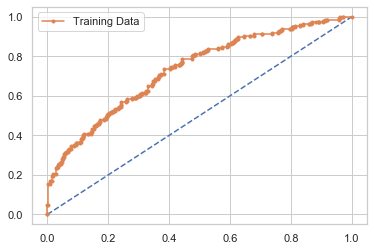

In [294]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train1,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train1,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.714


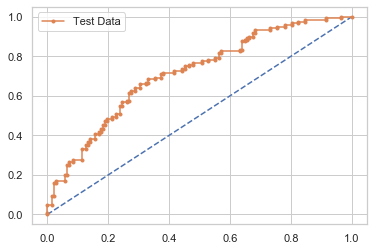

In [295]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test1,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test1,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [296]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Salary is -1.949312635383068e-05
The coefficient for age is -0.058445029274936756
The coefficient for educ is 0.055894462070796756
The coefficient for no_young_children is -1.363217023869716
The coefficient for no_older_children is -0.057106551906486225
The coefficient for foreign is 1.247624094266054


In [279]:
X_train.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1


In [280]:
X_test.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0


In [281]:
y_train.head()

821    0
805    0
322    0
701    1
773    1
Name: Holliday_Package, dtype: int8

In [282]:
y_test.head()

264    1
189    0
643    0
65     1
241    0
Name: Holliday_Package, dtype: int8

In [302]:
df['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [303]:
df['Holliday_Package'].value_counts()/872

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64